From the example: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

In [4]:
def generate_signal(noise_scale, phase_shift):

    x = np.arange(128) / 128

    PIT = 1
    Fs = 10e3  # Sampling Freq
    Freq =1  # Jammer Freq
    NumSamples = PIT * Fs  # Number of samples to process
    t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
    # sig1 = np.sin(2 * np.pi * x)
    # sig2 = np.sin(2 * np.pi * x + 0.05*np.pi)
    sig1 = 1 * np.exp(2j * np.pi * Freq * t)
    sig2 = 1 * np.exp(2j * (np.pi * Freq * t + 1/2*phase_shift*np.pi))

#     sig1_noise = sig1 + noise_scale*np.random.randn(len(sig1))
#     sig2_noise = sig2 + noise_scale*np.random.randn(len(sig2))
    sig1_noise = noise_scale*np.random.randn(len(sig1))
    sig2_noise = noise_scale*np.random.randn(len(sig2))

    return sig1_noise, sig2_noise


In [5]:
def plot_sigs(sig1, sig2, corr, corr_lags):
    fig, (ax_orig, ax_noise, ax_corr_real, ax_corr_imag, ax_corr_abs) = plt.subplots(5, 1, figsize=(10, 10))

    ax_orig.plot(sig1.real)
    ax_orig.plot(sig2.real)

#     ax_orig.plot(sig1.imag)
#     ax_orig.plot(sig2.imag)

    ax_orig.set_title('Original signal')

    ax_orig.set_xlabel('Sample Number')

    ax_noise.plot(sig1.imag)
    ax_noise.plot(sig2.imag)

    ax_noise.set_title('Signal Imag')

    ax_noise.set_xlabel('Sample Number')

    ax_corr_real.plot(corr_lags, corr.real)

    ax_corr_real.set_title('Cross-correlated signal (real)')

    ax_corr_real.set_xlabel('Lag')

    ax_corr_imag.plot(corr_lags, corr.imag)

    ax_corr_imag.set_title('Cross-correlated signal (imag)')

    ax_corr_imag.set_xlabel('Lag')

    ax_corr_abs.plot(corr_lags, abs(corr))

    ax_corr_abs.set_title('Cross-correlated signal (abs)')

    ax_corr_abs.set_xlabel('Lag')
    
    
    ax_orig.margins(0, 0.1)

    ax_noise.margins(0, 0.1)

    ax_corr_real.margins(0, 0.1)

    ax_corr_imag.margins(0, 0.1)

    fig.tight_layout()

    plt.show()

In [9]:
sig1_noise, sig2_noise = generate_signal(0, 1)
corr = signal.correlate(sig1_noise, sig2_noise)

corr_lags = signal.correlation_lags(len(sig1_noise), len(sig2_noise))

# corr /= np.max(corr)

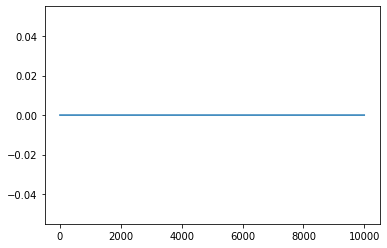

In [11]:
plt.plot(sig1_noise)

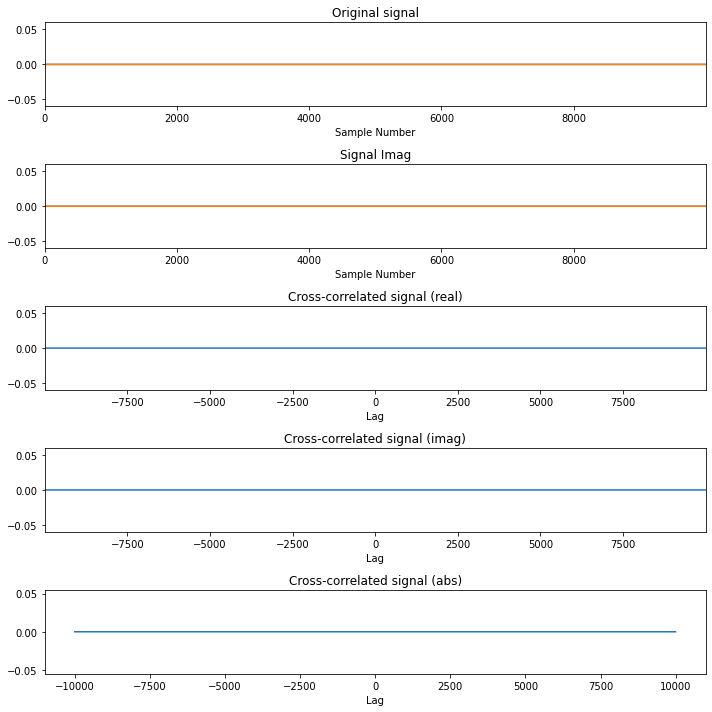

In [7]:
plot_sigs(sig1_noise, sig2_noise, corr, corr_lags)

In [238]:
corr_lags[np.argmax(corr)]

-4127

In [239]:
corr_lags[np.argmax((corr.imag))]

-1745